<a href="https://colab.research.google.com/github/ubinix-warun/mad-bootcamp-2024/blob/main/colab/Lesson_7_Colab_for_Chapter_7_5_7_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7.5 Binary Classification – Thresholding and Precision-Recall Trade-off

##1. Given data

In [ ]:
# Chapter 7.5 Binary Classification – Thresholding and Precision-Recall Trade-off

import numpy as np

# Mock data for y_true and predicted probabilities (y_scores)
y_scores = np.array([0.95, 0.9, 0.8, 0.7, 0.6, 0.45, 0.4, 0.3, 0.2, 0.1])
y_true = np.array([True, True, True, False, True, True, False, True, False, False])



##2. Thresholding

In [ ]:
from sklearn.metrics import confusion_matrix

# Threshold
threshold = 0.75

# Perform thresholding
y_pred = np.array([score >= threshold for score in y_scores])

# Print results
print("Threshold:", threshold)
print("Predicted labels (y_pred): \t", y_pred)
print("True labels (y_true): \t\t", y_true)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate accuracy, precision and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Threshold: 0.75
Predicted labels (y_pred): 	 [ True  True  True False False False False False False False]
True labels (y_true): 		 [ True  True  True False  True  True False  True False False]
Accuracy: 0.7
Precision: 1.0
Recall: 0.5


In [ ]:
# Threshold
threshold = 0.25

# Perform thresholding
y_pred = np.array([score >= threshold for score in y_scores])

# Print results
print("Threshold:", threshold)
print("Predicted labels (y_pred): \t", y_pred)
print("True labels (y_true): \t\t", y_true)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate accuracy, precision and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Threshold: 0.25
Predicted labels (y_pred): 	 [ True  True  True  True  True  True  True  True False False]
True labels (y_true): 		 [ True  True  True False  True  True False  True False False]
Accuracy: 0.8
Precision: 0.75
Recall: 1.0


##3. Precision-Recall Trade-off

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Given data
y_scores = np.array([0.95, 0.9, 0.8, 0.7, 0.6, 0.45, 0.4, 0.3, 0.2, 0.1])
y_true = np.array([True, True, True, False, True, True, False, True, False, False])

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
print(f'Threshold: {thresholds}')
print(f'Precision: {precisions}')
print(f'Recall: {recalls}')




Threshold: [0.1  0.2  0.3  0.4  0.45 0.6  0.7  0.8  0.9  0.95]
Precision: [0.6        0.66666667 0.75       0.71428571 0.83333333 0.8
 0.75       1.         1.         1.         1.        ]
Recall: [1.         1.         1.         0.83333333 0.83333333 0.66666667
 0.5        0.5        0.33333333 0.16666667 0.        ]


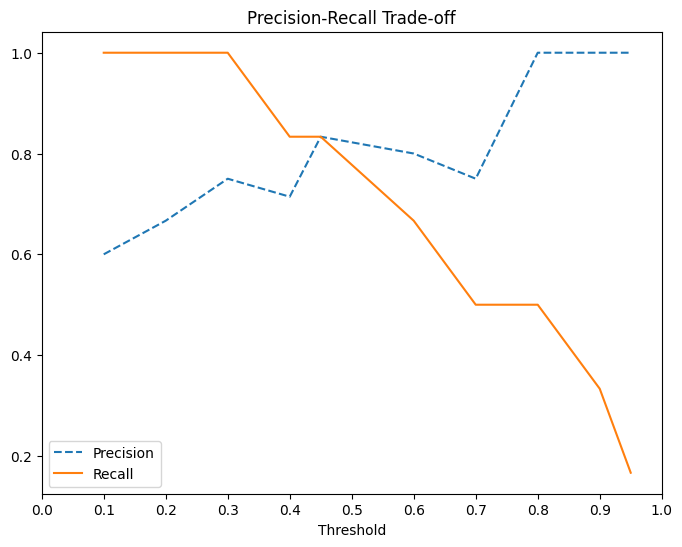

In [ ]:
# Plot precision-recall trade-off
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", linestyle='--')
plt.plot(thresholds, recalls[:-1], label="Recall", linestyle='-')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Threshold")
plt.title("Precision-Recall Trade-off")
plt.legend()
plt.show()


# Chapter 7.6 Binary Classification – Area Under the Curve (AUC)

## 1. Precision-Recall Curve and AUC

In [ ]:
# Chapter 7.6 Binary Classification – Area Under the Curve (AUC)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Given data
y_scores = np.array([0.95, 0.9, 0.8, 0.7, 0.6, 0.45, 0.4, 0.3, 0.2, 0.1])
y_true = np.array([True, True, True, False, True, True, False, True, False, False])

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)

# Calculate AUC for the precision-recall curve
pr_auc = auc(recalls, precisions)

print(f'Precision: {precisions}')
print(f'Recall: {recalls}')
print(f'Threshold: {thresholds}')
print(f'Precision-Recall AUC: {pr_auc:.2f}')




Precision: [0.6        0.66666667 0.75       0.71428571 0.83333333 0.8
 0.75       1.         1.         1.         1.        ]
Recall: [1.         1.         1.         0.83333333 0.83333333 0.66666667
 0.5        0.5        0.33333333 0.16666667 0.        ]
Threshold: [0.1  0.2  0.3  0.4  0.45 0.6  0.7  0.8  0.9  0.95]
Precision-Recall AUC: 0.89


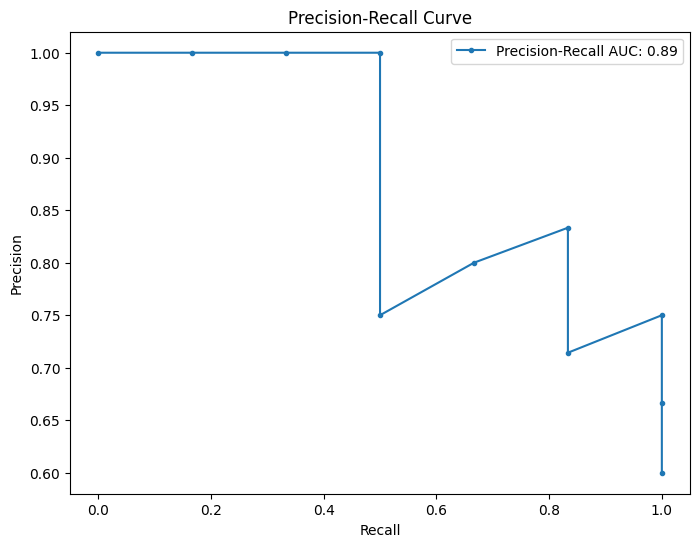

In [ ]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.', label=f'Precision-Recall AUC: {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

##2. ROC Curve and AUC

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Given data
y_scores = np.array([0.95, 0.9, 0.8, 0.7, 0.6, 0.45, 0.4, 0.3, 0.2, 0.1])
y_true = np.array([True, True, True, False, True, True, False, True, False, False])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

# Print ROC curve data
print(f'False Positive Rate: {fpr}')
print(f'True Positive Rate: {tpr}')
print(f'Thresholds: {thresholds}')
print(f'ROC AUC: {roc_auc}')



False Positive Rate: [0.   0.   0.   0.25 0.25 0.5  0.5  1.  ]
True Positive Rate: [0.         0.16666667 0.5        0.5        0.83333333 0.83333333
 1.         1.        ]
Thresholds: [1.95 0.95 0.8  0.7  0.45 0.4  0.3  0.1 ]
ROC AUC: 0.8333333333333334


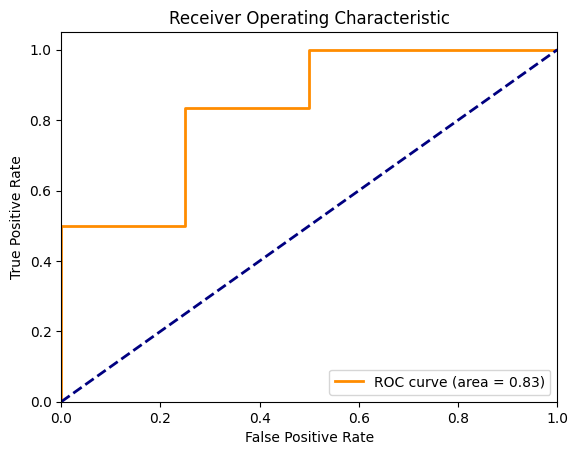

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
